In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

transform_input = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_output = transforms.Compose([
    transforms.CenterCrop(24),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_input)
trainset_output = torchvision.datasets.CIFAR10(root='./data', train=True,
                                               download=True, transform=transform_output)
device='cuda'

class CIFAR10Dataset(torch.utils.data.Dataset):
    def __init__(self, input_dataset, output_dataset):
        self.input_dataset = input_dataset
        self.output_dataset = output_dataset
        
    def __getitem__(self, index):
        input_image, _ = self.input_dataset[index]
        output_image, _ = self.output_dataset[index]
        
        return input_image, output_image
    
    def __len__(self):
        return len(self.input_dataset)


batch_size = 32*32

trainloader = torch.utils.data.DataLoader(CIFAR10Dataset(trainset, trainset_output), batch_size=batch_size,
                                          shuffle=True)


import torch.optim as optim

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3072)
        self.reshape = nn.Unflatten(1, (3, 32, 32))

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.reshape(x)
        return x

# Define the loss function and optimizer
criterion = nn.MSELoss()
net = Net()
net=net.to(device)
optimizer = optim.Adam(net.parameters(), lr=1e-3)

# Train the model
for epoch in range(50):
    print('Epoch: ', epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    print('Loss: ', running_loss)
    print("\n")
print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
Epoch:  0
Loss:  10.521167293190956


Epoch:  1
Loss:  9.239515393972397


Epoch:  2
Loss:  8.817277550697327


Epoch:  3
Loss:  8.671343937516212


Epoch:  4
Loss:  8.562895253300667


Epoch:  5
Loss:  8.483175173401833


Epoch:  6
Loss:  8.41919195652008


Epoch:  7
Loss:  8.368881300091743


Epoch:  8
Loss:  8.33047080039978


Epoch:  9
Loss:  8.298574075102806


Epoch:  10
Loss:  8.272568315267563


Epoch:  11
Loss:  8.251718044281006


Epoch:  12
Loss:  8.232310444116592


Epoch:  13
Loss:  8.213437959551811


Epoch:  14
Loss:  8.197256207466125


Epoch:  15
Loss:  8.181117966771126


Epoch:  16
Loss:  8.164479836821556


Epoch:  17
Loss:  8.15206292271614


Epoch:  18
Loss:  8.134968370199203


Epoch:  19
Loss:  8.124874129891396


Epoch:  20
Loss:  8.114369302988052


Epoch:  21
Loss:  8.10234820842743


Epoch:  22
Loss:  8.09400574862957


Epoch:  23
Loss:  8.083428770303726


Epoch:  24
Loss:  8.074494

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'Output Image')

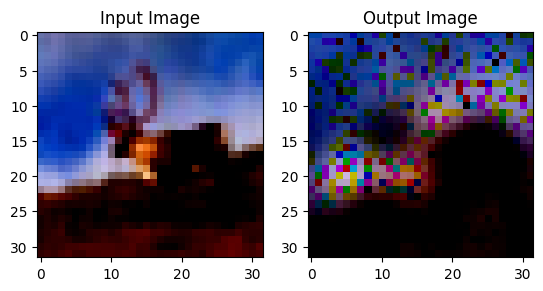

In [20]:
import matplotlib.pyplot as plt

model=net.to('cpu')

# Set the model to evaluation mode
model.eval()

# Get a random batch of images
dataiter = iter(trainloader)
input_images, output_images = next(dataiter)

# Get a random image index
idx = 5

# Get the input and output images for the random index
input_image = input_images[idx]
output_image = output_images[idx]

# Forward pass through the model
with torch.no_grad():
    output = model(input_image.unsqueeze(0))

print(input_image.shape)

# Convert the output tensor to a numpy array and reshape it
output = output.squeeze().cpu().reshape(3, 32, 32)

# output=output.type(torch.IntTensor)

# Plot the input and output images side by side
fig, axs = plt.subplots(1, 2)
axs[0].imshow(input_image.permute(1, 2, 0))
axs[0].set_title('Input Image')
axs[1].imshow(output.permute(1, 2, 0))
axs[1].set_title('Output Image')



In [24]:
import matplotlib.pyplot as plt
import numpy as np

model=net.to('cpu')

# Set the model to evaluation mode
model.eval()

# Get a random batch of images
dataiter = iter(trainloader)
input_images, output_images = next(dataiter)

# Get a random image index
inputer=[]
outputer=[]
for i in range(100):
    idx = i

    # Get the input and output images for the random index
    input_image = input_images[idx]
    output_image = output_images[idx]

    # Forward pass through the model
    with torch.no_grad():
        output = model(input_image.unsqueeze(0))

    # Convert the output tensor to a numpy array and reshape it
    output = output.squeeze().cpu().reshape(3, 32, 32)

    #convert input_image and output to numpy
    input_image = input_image.cpu().numpy()
    output = output.cpu().numpy()

    inputer.append(input_image)
    outputer.append(output)

#convert inputer and outputer to numpy
inputer = np.array(inputer)
outputer = np.array(outputer)

#save
np.save('inputer.npy', inputer) 
np.save('outputer.npy', outputer)

    

